1. datasets chosen : https://ourworldindata.org/nuclear-energy
2. data preprocessing : 
3. whhy do i chose the data : 
    - the data collected spans from 1965 to 2022
    - based on three main sources: BP Statistical Review of World Energy., Ember Yearly Electricity Data (2023)., Ember European Electricity Review (2022).
    - high quality, accurate, clearly defined, and well-tested data
    - relevant to the problem
    - provides more than one database
    - provides breakdown of data for each region, even country
4. the problem : common non renewable energy is causing global warming, renewable energy is too expensive and not reliable enough. 
5. factor analysis, on safety factor of multiple energy generation sources on 3 variables : energy generated (or precentage), death toll, co2 emmissions (only on 2021)
6. explain results with graphics, solution : nuclear energy is the solution because its safe, efficient, and flexible
7. remarks and suggestion
8. write article

# 1. Datasets Chosen 
- Nuclear Energy Generation
- Electricity Production Source
- Death Rates from Energy Production
- Greenhouse Gas Emissions from Production Source

https://ourworldindata.org/nuclear-energy

# 2. Data Preprocessing
- Electricity Production Source

In [1]:
import pandas as pd

# import all data
electricityprod = pd.read_csv('./electricity-prod-source-stacked.csv')
deathrates = pd.read_csv('./death-rates-from-energy-production-per-twh.csv')
greenhouse = pd.read_csv('./greenhouse-gas-emissions.csv')


# change column name to only nuclear
electricityprod = electricityprod.rename(columns={'Other renewables excluding bioenergy (TWh) (zero filled)': 'Others'})
electricityprod = electricityprod.rename(columns={'Electricity from bioenergy (TWh) (zero filled)': 'Biomass'})
electricityprod = electricityprod.rename(columns={'Electricity from solar (TWh)': 'Solar'})
electricityprod = electricityprod.rename(columns={'Electricity from wind (TWh)': 'Wind'})
electricityprod = electricityprod.rename(columns={'Electricity from hydro (TWh)': 'Hydropower'})
electricityprod = electricityprod.rename(columns={'Electricity from nuclear (TWh)': 'Nuclear'})
electricityprod = electricityprod.rename(columns={'Electricity from oil (TWh)': 'Oil'})
electricityprod = electricityprod.rename(columns={'Electricity from gas (TWh)': 'Gas'})
electricityprod = electricityprod.rename(columns={'Electricity from coal (TWh)': 'Coal'})
electricityprod.head()


,Entity,Code,Year,Others,Biomass,Solar,Wind,Hydropower,Nuclear,Oil,Gas,Coal
0,Afghanistan,AFG,2000,0.0,0.0,0.0,0.0,0.31,0.0,0.16,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.0,0.0,0.0,0.50,0.0,0.09,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.0,0.0,0.0,0.56,0.0,0.13,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.0,0.0,0.0,0.63,0.0,0.31,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.0,0.0,0.0,0.56,0.0,0.33,0.0,0.0


In [2]:
# filter for region (Asia, Europe, North America, South America, Africa, Oceania)
electricityprod2 = electricityprod[electricityprod['Entity'].isin(['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Oceania'])]
electricityprod2.head()

,Entity,Code,Year,Others,Biomass,Solar,Wind,Hydropower,Nuclear,Oil,Gas,Coal
22,Africa,NaN,1965,0.0,0.0,NaN,0.0,13.905635,0.0,NaN,NaN,NaN
23,Africa,NaN,1966,0.0,0.0,NaN,0.0,15.510005,0.0,NaN,NaN,NaN
24,Africa,NaN,1967,0.0,0.0,NaN,0.0,16.190636,0.0,NaN,NaN,NaN
25,Africa,NaN,1968,0.0,0.0,NaN,0.0,18.938341,0.0,NaN,NaN,NaN
26,Africa,NaN,1969,0.0,0.0,NaN,0.0,22.100891,0.0,NaN,NaN,NaN


In [3]:
# filter for year (2021)
electricityprod3 = electricityprod2[electricityprod2['Year'].isin([2021])]
electricityprod3.head()

,Entity,Code,Year,Others,Biomass,Solar,Wind,Hydropower,Nuclear,Oil,Gas,Coal
78,Africa,NaN,2021,5.12,4.39000,17.12000,20.89000,145.22,12.15,72.65,337.20,224.61
504,Asia,NaN,2021,41.13,302.34000,586.96000,786.19995,1940.53,713.87,372.97,2620.34,8021.25
3035,Europe,NaN,2021,7.70,211.01001,187.68001,473.43000,776.65,1111.45,124.64,1192.77,693.73
6818,North America,NaN,2021,27.10,79.69000,188.20000,440.29000,687.87,876.98,129.35,1868.97,956.53
7190,Oceania,NaN,2021,8.22,3.75000,28.62000,28.77000,40.55,0.00,14.57,50.09,128.49


In [4]:
# sum each column from all regions
electricityprod4 = electricityprod3.sum(axis=0)
# delete entity, code, and year object
del electricityprod4['Entity']
del electricityprod4['Code']
del electricityprod4['Year']

# round every column to 3 decimal places
electricityprod4['Biomass'] = round(electricityprod4['Biomass'], 3).astype(float)
electricityprod4['Solar'] = round(electricityprod4['Solar'], 3).astype(float)
electricityprod4['Wind'] = round(electricityprod4['Wind'], 3).astype(float)
electricityprod4['Hydropower'] = round(electricityprod4['Hydropower'], 3).astype(float)
electricityprod4['Nuclear'] = round(electricityprod4['Nuclear'], 3).astype(float)
electricityprod4['Oil'] = round(electricityprod4['Oil'], 3).astype(float)
electricityprod4['Gas'] = round(electricityprod4['Gas'], 3).astype(float)
electricityprod4['Coal'] = round(electricityprod4['Coal'], 3).astype(float)
electricityprod4['Others'] = round(electricityprod4['Others'], 3).astype(float)

# convert to dataframe with column name 'energy' and 'Energy Generated (TWh)'
electricityprod5 = electricityprod4.to_frame(name='energy').reset_index()
electricityprod5 = electricityprod5.rename(columns={'energy': 'Electricity Generated (TWh)'})
electricityprod5 = electricityprod5.rename(columns={'index': 'Entity'})

# delete first row reset index
electricityprod5 = electricityprod5.drop(electricityprod5.index[0])

#reset index
electricityprod5 = electricityprod5.reset_index(drop=True)

print(electricityprod5)


       Entity Electricity Generated (TWh)
0     Biomass                      666.28
1       Solar                     1040.46
2        Wind                     1848.25
3  Hydropower                     4216.36
4     Nuclear                     2739.32
5         Oil                      764.52
6         Gas                     6337.96
7        Coal                     10085.9


In [5]:

# rename column of deathrates 
deathrates = deathrates.rename(columns={'Deaths per TWh of electricity production': 'Deaths per TWh'})

# remove code and year column
del deathrates['Code']
del deathrates['Year']

print(deathrates)

       Entity  Deaths per TWh
0     Biomass           4.630
1        Coal          24.620
2         Gas           2.821
3  Hydropower           1.300
4     Nuclear           0.030
5         Oil          18.430
6       Solar           0.019
7        Wind           0.035


In [6]:
# delete unnecessary columns
del greenhouse['Code']
del greenhouse['Year']

# rename column of greenhouse
greenhouse = greenhouse.rename(columns={'greenhouse_emissions': 'CO2 Emissions per Twh'})

# divide co2 emissions by 1000
greenhouse['CO2 Emissions per Twh'] = greenhouse['CO2 Emissions per Twh'] / 1000

print(greenhouse)

       Entity  CO2 Emissions per Twh
0     Biomass                  0.152
1        Coal                  0.820
2         Gas                  0.490
3  Hydropower                  0.034
4     Nuclear                  0.003
5         Oil                  0.720
6       Solar                  0.005
7        Wind                  0.004


In [7]:
# combine greenhouse, electricityprod5, and deathrates
combined = pd.merge(greenhouse, electricityprod5, on='Entity')
combined2 = pd.merge(combined, deathrates, on='Entity')
print(combined2)

       Entity  CO2 Emissions per Twh Electricity Generated (TWh)  \
0     Biomass                  0.152                      666.28   
1        Coal                  0.820                     10085.9   
2         Gas                  0.490                     6337.96   
3  Hydropower                  0.034                     4216.36   
4     Nuclear                  0.003                     2739.32   
5         Oil                  0.720                      764.52   
6       Solar                  0.005                     1040.46   
7        Wind                  0.004                     1848.25   

   Deaths per TWh  
0           4.630  
1          24.620  
2           2.821  
3           1.300  
4           0.030  
5          18.430  
6           0.019  
7           0.035  


# 3. Reason for choosing the data
- the data collected spans from 1965 to 2022
- based on three main sources: BP Statistical Review of World Energy., Ember Yearly Electricity Data (2023)., Ember European Electricity Review (2022).
- high quality, accurate, clearly defined, and well-tested data
- relevant to the problem
- provides more than one database
- provides breakdown of data for each region, even country

# 4. The Problem

common non renewable energy is causing global warming, renewable energy is too expensive and not reliable enough. 

# 5. Exploratory Factor Analysis - Safety Factor

factor analysis performed on 8 energy sources, with 3 variables : energy generated (or precentage), death toll, co2 emmissions (only on 2021)

In [8]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# drop entity column
combined2.drop(['Entity'], axis=1, inplace=True)

#convert combined2 electricity generated column to float64
combined2['Electricity Generated (TWh)'] = (combined2['Electricity Generated (TWh)']).astype(float)
print(combined2)

   CO2 Emissions per Twh  Electricity Generated (TWh)  Deaths per TWh
0                  0.152                       666.28           4.630
1                  0.820                     10085.90          24.620
2                  0.490                      6337.96           2.821
3                  0.034                      4216.36           1.300
4                  0.003                      2739.32           0.030
5                  0.720                       764.52          18.430
6                  0.005                      1040.46           0.019
7                  0.004                      1848.25           0.035


In [9]:
# calculate kmo test of combined2
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(combined2)
kmo_model

# 0.61 means the sampling adequacy of the data is enough

0.6123111816959611

In [10]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
factor_analyzer = FactorAnalyzer(n_factors=1, method='principal', rotation='varimax')
factor_analyzer.fit(combined2)
loadings = factor_analyzer.loadings_
loadings

c:\Python310\lib\site-packages\factor_analyzer\factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([[0.95296743],
       [0.74552628],
       [0.93102333]])

# 6. Explain the Results using graphs

In our exploration factor analysis, we chose 3 variables to analyze, namely CO2 emissions per Twh, Electricity Generated (Twh), and Deaths per Twh.
Lets graph it out first.

       Entity  CO2 Emissions per Twh  Electricity Generated (TWh)  \
0     Biomass                  0.152                       666.28   
1        Coal                  0.820                     10085.90   
2         Gas                  0.490                      6337.96   
3  Hydropower                  0.034                      4216.36   
4     Nuclear                  0.003                      2739.32   
5         Oil                  0.720                       764.52   
6       Solar                  0.005                      1040.46   
7        Wind                  0.004                      1848.25   

   Deaths per TWh  
0           4.630  
1          24.620  
2           2.821  
3           1.300  
4           0.030  
5          18.430  
6           0.019  
7           0.035  


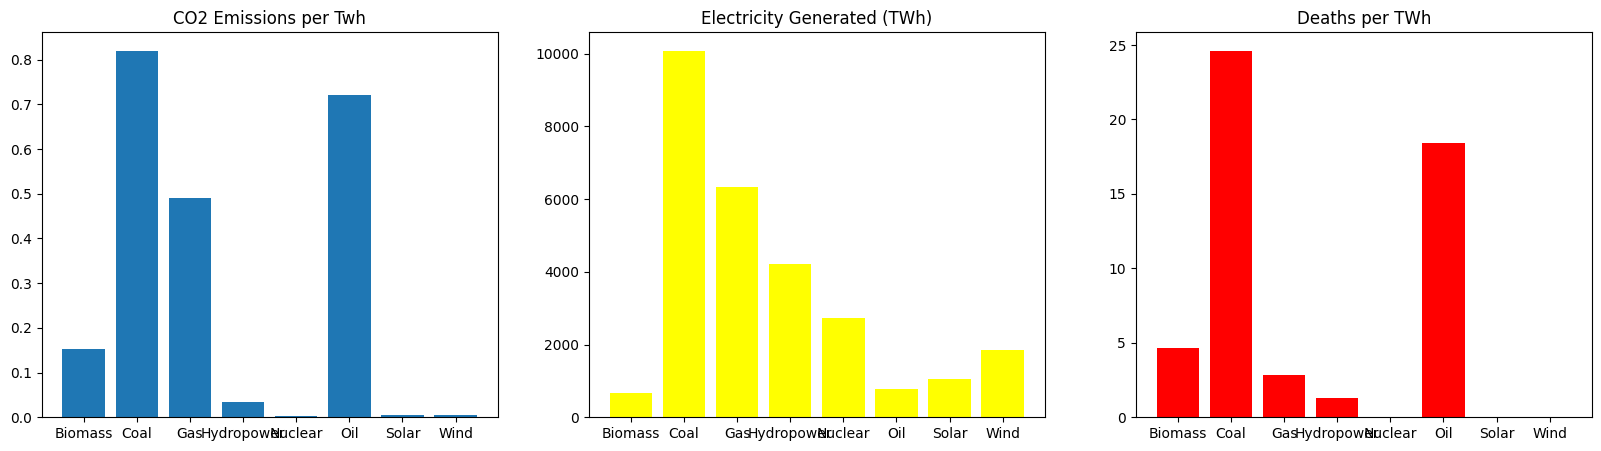

In [11]:
import matplotlib.pyplot as plt

# add new column named entity in the front
combined2['Entity'] = ['Biomass', 'Coal', 'Gas', 'Hydropower', 'Nuclear', 'Oil', 'Solar', 'Wind']

# move entity column to the left
combined3 = combined2[['Entity', 'CO2 Emissions per Twh', 'Electricity Generated (TWh)', 'Deaths per TWh']]
print(combined3)

# make 3 graphs containing bar graph for each column
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].bar(combined3['Entity'], combined3['CO2 Emissions per Twh'])
ax[0].set_title('CO2 Emissions per Twh')
ax[1].bar(combined3['Entity'], combined3['Electricity Generated (TWh)'], color='yellow')
ax[1].set_title('Electricity Generated (TWh)')
ax[2].bar(combined3['Entity'], combined3['Deaths per TWh'], color='red')
ax[2].set_title('Deaths per TWh')
plt.show()




The general idea is for the SAFETY factor, we tested 2 variables, CO2 emissions and Deaths per Twh. CO2 emissions refer to the effect of chosen power generation method to global warming, meanwhile deaths per Twh refer to how dangerous it is to operate the power generation method.

Then the final variable, which is electricity generated, is simply the basic efficiency of the power generation method. A power generation method that doesn't output good amount of electricity will always be bad no matter how safe it is, because its the main purpose of the power generation method; to generate electricity.

First we check the KMO value, and we get 0.61. it means the sampling adequacy of our data is good enough.
Then we perform exploratory factor analysis with just 1 n_factor, which is the safety factor.
result shows (0.95, 0.74, 0.93)
it means the CO2 emissions variable has 95% association with the safety factor
the Electricity Generated variable has 74% association with the safety factor
the Deaths per Twh variable has 93% association with the safety factor

With that, lets use these numbers to rank the safest power generation method 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13044\1718222651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined3['WeightedAverage'][i] = ((combined3['CO2 Emissions per Twh'][i] * 0.95) + (combined3['Electricity Generated (TWh)'][i] * 0.74) + (combined3['Deaths per TWh'][i] * -0.93)) / (combined3['CO2 Emissions per Twh'][i] + combined3['Electricity Generated (TWh)'][i] + combined3['Deaths per TWh'][i])


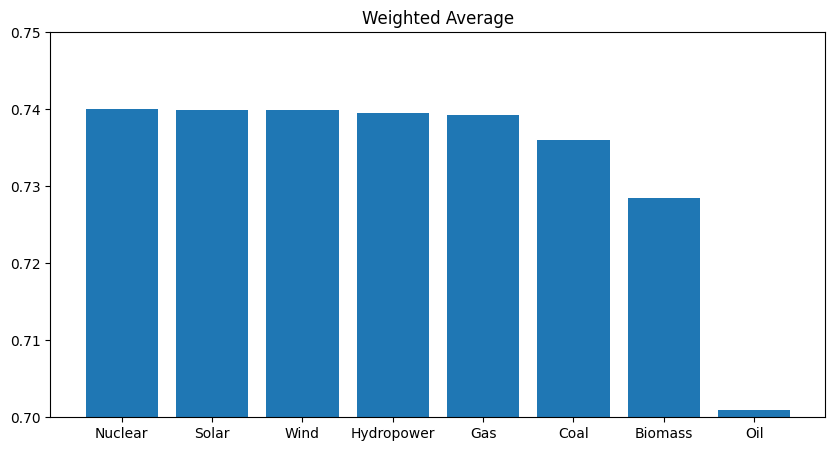

In [33]:
# add a new column in combined3 named 'Total'
combined3['WeightedAverage'] = [0, 0, 0, 0, 0, 0, 0, 0]

# calculate the weighted average, death per twh is inverted because it is a negative factor
for i in range(len(combined3)):
    combined3['WeightedAverage'][i] = ((combined3['CO2 Emissions per Twh'][i] * 0.95) + (combined3['Electricity Generated (TWh)'][i] * 0.74) + (combined3['Deaths per TWh'][i] * -0.93)) / (combined3['CO2 Emissions per Twh'][i] + combined3['Electricity Generated (TWh)'][i] + combined3['Deaths per TWh'][i])

# sort by weighted average
combined3 = combined3.sort_values(by=['WeightedAverage'], ascending=False)

# graph the weighted average, adjust the y scale to see the difference
plt.figure(figsize=(10, 5))
plt.title('Weighted Average')
plt.bar(combined3['Entity'], combined3['WeightedAverage'])
plt.ylim(0.7, 0.75)

plt.show()


Here we see nuclear winning because it has decent electricity generation (despite having very few power plants) and almost nonexistent CO2 emission and death per Twh. Most renewables follows close. Coal is quite interesting, it expels a lot of CO2 and is very dangerous to operate, but it generates so much power because its so cheap and easy to use, not to mention reliable.

# 7. Remarks and Suggestions

Need to explore more datasets such as fuel cost per year, plant building investment, and operating costs to attain more important factors such as efficiency and reliability.

# 8. Article
# Nuclear Power is The Future

## Introduction
As our modern civilization continues to grow and evolve, the demand for energy is increasing at an unprecedented rate. However, our current methods of power generation, such as fossil fuels, hydroelectric, and renewable energy sources, are not capable of meeting the world's energy needs on their own. Moreover, these methods of power generation have their own set of limitations and drawbacks, such as air pollution, climate change, and the need for large land areas.

To address this issue, nuclear power has emerged as a viable alternative to traditional energy sources. Despite its controversial reputation, nuclear power offers many benefits such as high energy output, low greenhouse gas emissions, and a relatively small environmental footprint. Furthermore, advances in nuclear technology have made it increasingly safe and efficient, with modern nuclear reactors designed with multiple layers of safety features to prevent accidents and mitigate the consequences if they occur.

Therefore, as the demand for energy continues to increase, and the need for a sustainable and reliable power source becomes more critical, nuclear power has become an essential consideration for meeting our energy needs in a safe, efficient, and sustainable way.

## Non-Renewables

### The Ol' Reliable is Dying
Non-renewable energy sources are energy resources that are finite and can be depleted over time. They include fossil fuels such as coal, oil, and natural gas, as well as nuclear energy sources like uranium. Yes, uranium, the fuel of nuclear power, we'll talk more about that later.

Right now, non-renewables are viewed as the dirty and cheap energy. Pollution from non-renewable sources also contributes the most to global warming, smog, and human deaths. Despite the apparent disadvantages, globally, non-renewable energy sources such as fossil fuels, nuclear, and hydroelectric power continue to be the primary sources of energy.

### Cheap electricity anytime, anywhere
Non-renewable energy sources like fossil fuels and nuclear power have been the primary sources of energy for human civilization for many decades. While they are not sustainable, they still offer a range of benefits, including:

- High Energy Density: Non-renewable energy sources have a high energy density, meaning they contain a significant amount of energy per unit of volume or mass, which makes them a reliable and efficient source of energy.

- Cost-Effective: Fossil fuels, in particular, have been the cheapest source of energy for many years, making them an affordable option for powering homes, industries, and transportation.

- Reliability: Non-renewable energy sources offer a reliable source of energy that can be used to meet the energy demands of a growing population, ensuring a stable supply of electricity and energy.

- Established Infrastructure: The infrastructure for non-renewable energy sources is well-established and readily available, making it easier to supply energy to remote locations or areas with limited infrastructure.

### The smog cooks you alive and chokes your breath

Non-renewable energy sources have a range of significant disadvantages, including:

- Environmental Impact: Non-renewable energy sources, particularly fossil fuels, have a significant impact on the environment, contributing to air pollution, water pollution, and climate change, which has far-reaching and long-term consequences for the planet and all living beings.

- Finite Resources: Non-renewable energy sources are finite and can be depleted over time, which means that they cannot meet the growing energy demands of a growing population indefinitely.

- Price Volatility: The price of non-renewable energy sources can be volatile and subject to price fluctuations, which can make it challenging to plan and budget for energy costs.

- Health and Safety Risks: Non-renewable energy sources, such as coal mining and oil drilling, pose significant health and safety risks to workers and communities, including accidents, explosions, and exposure to toxic substances. Energy generated from non-renewable sources has the highest death per terawatt ratio.

- Geopolitical Tensions: Non-renewable energy sources can contribute to geopolitical tensions and conflicts, particularly in regions where they are abundant or located near strategic locations.

## Renewables

### The Sun, The Wind, and The Ocean
Renewable energy refers to sustainable energy sources that can be naturally replenished, such as solar, wind, hydro, geothermal, and bioenergy. Unlike non-renewable resources, these energy options offer a continuous and environmentally friendly power supply. By harnessing these renewable sources, we can reduce our reliance on fossil fuels, decrease greenhouse gas emissions, and pave the way for a cleaner and more sustainable energy future.

Currently, renewable energy tech is quite developed, but still need to mature more. Countries all over the world are adopting renewables slowly and are benefitting from it. However because of the lack of maturity, no countries can rely full on renewables alone. The maturity problem mostly lies in efficiency issue, unsustainable battery economy, and high capital costs.

### Energy from Infinity
Renewable energy is free energy. It's the everlasting future our civilization need. Here are some advantages of renewable energy:

- Infinite : The Sun will die in about 4.6 billion years from now, which is such a long time, humanity might even fade away before the sun dies out. The wind is an ever shifting force, never rests, never stops. The ocean is made of water that can store and cause a huge amount of kinetic energy. All of these things are virtually infinite.

- Clean : Renewable energy produces a tiny amount of CO2 because most of the energy generation process converts heat into kinetic or vice versa. No chemical reactions, no smog, no greenhouse gases.

- Safe : Unlike coal plant that has to be constantly babysitted, most of renewable energy sources are quite convenient and independent. They still require maintenance, but not as often as non-renewable machines. Most of the time, we simply need to clean it.

### Cloudy with a chance of blackout
Turns out the infinite still has some costs. Here are some of the drawbacks of renewable energy:

- Unreliable : Quite paradoxical to its infinite nature, even though the sun shines forever, there is still something else that affects our ability to harness the sun's power; the clouds. The winds are ever-shifting, but it doesnt always move to where the windmills are waiting. The ocean can dry up if it kept being gazed by the sun. One way to combat this unreliablity is to connect a battery. But battery is made of something limited, so it's not a complete solution.

- Expensive : Windmill's blades are hand crafted from layers upon layers of fibreglass soaked in epoxy. Then we need to move the humongous blades to the windfarm through narrow and busy city. Not to mention we need to free the land from private owners to make a functional wind farm. Renewables aren't cheap. Even though the investment will always be worth it, its not easy to gather a stupendous amount of cash to finance the building proccess.

- Limited efficiency : the absolute best humanity can muster for solar panel efficiency is 25%. Meanwhile for the common folk, that figure comes down to 13-17%. A pitiable amount compared to 60% efficiency achived by non-renewable gas power plants. However, advancements in power generator designs and material science will hopefully increase its efficiency up to 50%. Hopefully.

## Nuclear Power

### The Infamous Golden Kid, Nuclear Power
Nuclear power is the energy generated by a nuclear reactor. The atom consists of proton, neutron, and electron. According to modern quantum mechanics research, the bond that keeps protons, neutron and electrons is extremely strong. By splitting the atom, we can release a huge amount of energy. This is the basic principle of nuclear power. The energy released by splitting the atom is used to heat water, which then turns into steam. The steam is used to turn a turbine, which then generates electricity.

Despite all the good signs, clean statistics, and the fact that nuclear power is the most efficient energy source, nuclear power is still a taboo. The reason is because of the infamous Chernobyl and Fukushima nuclear disasters. The Chernobyl disaster was caused by a combination of human error and design flaws in the reactor, while the Fukushima disaster was caused by a combination of a tsunami and a design flaw in the reactor. Both of these disasters were caused by human error and design flaws, not by the nuclear power itself. The adoption of nuclear power is still slow, and unfortunately its getting slower each year. New nuclear power plants with modern tech (thats dozens times safer and more efficient than the old reactors) exists, but sadly no one wants to build them.

### No Bond is Stronger than Atom's Bond
The power granted by an atom is no small feat, here are the benefits of nuclear power plants:
- Efficient : Nuclear power plants' efficiency makes the 60% efficiency of gas power plants look like a joke. Nuclear power plants can reach up to 90% efficiency, which is a huge leap from the 25% efficiency of solar panels. This means that nuclear power plants can generate more electricity with less fuel. Its simply the most efficient energy source we currently can take advantage of.

- Safe : The Infamous Chernobyl Incident killed 30 people and injured 155 people. The Fukushima Incident killed 1 engineer and injured 60 people. Those major incidents happened almost four decades ago, and a decade ago respectively. Meanwhile, the coal industry kills 7,500 people every year. The oil industry kills 36,000 people every year. The gas industry kills 4,000 people every year. Nuclear power is the safest energy source we currently have, as the statistics above shows.

- Clean : Nuclear power plants produce no greenhouse gases, no smog, no pollution, no nothing. The only thing nuclear power plants produce is electricity and a tiny amount of nuclear waste. Nuclear waste is a byproduct of the nuclear fission process. Nuclear waste is radioactive, but it can be stored safely in a nuclear waste storage facility. Nuclear waste is also a lot less than the waste produced by coal, oil, and gas power plants. 

### Scary Apocalytic Meltdown
Thanks to Hollywood movies, Anime and Novels, post-apocalyptic world usually has some sort of connection with malfunctioning nuclear power plants. The reality is much more beautiful than that. Sure, Nuclear power plants are not perfect, but we can always make it better. Here are some of the drawbacks of nuclear power plants:

- Immortal Waste : Nuclear waste is radioactive, and it can stay radioactive for a very long time. The half-life of nuclear waste can be up to 24,000 years. This means that nuclear waste can stay radioactive for a very long time. However, nuclear waste can be stored safely in a nuclear waste storage facility. Nuclear waste is also a lot less than the waste produced by coal, oil, and gas power plants. However, there's a type of nuclear reactor (breeder reactor) thats able to reduce the amount of nuclear waste produced by a nuclear power plant by 95%. The nuclear waste produced by a nuclear power plant is so small, it can be stored in a single room.

- Expensive : Nuclear power plants are expensive to build. The cost of building a nuclear power plant is around USD5,000 per kilowatt. The cost of building a coal power plant is around USD3,000 per kilowatt. The cost of building a gas power plant is around USD1,000 per kilowatt. The cost of building a solar power plant is around USD1,500 per kilowatt. The cost of building a wind power plant is around USD1,500 per kilowatt. The cost of building a hydro power plant is around USD2,000 per kilowatt. The cost of building a geothermal power plant is around USD3,000 per kilowatt. The cost of building



## Conclusion

Our current civilization demands more sustainable energy delivered in a safe way. Today's energy production is dominated by non-renewables. Thankfully, countries and companies are starting to wake up and push renewable energy forward. However, the adoption of renewable energy is still slow due to renewable energy's unreliability, low efficiency, and expensive cost. There will be the time where renewable energy sources fully matures and everyone, including the common folk wouldn't have to worry about electricity anymore. However, that is still far to the future. The best approach for today is to switch to Nuclear power. Countless statistics shows that nuclear power is the safest energy source we currently have. Nuclear power plants are also clean, efficient, and reliable. Nuclear power plants are expensive to build, but the cost of building a nuclear power plant is worth it. Nuclear power plants are the best energy source we currently have, and we should start building more of them. 